<font color=blue>TITLE:</font> KAGGLE WORKFLOW - TITANIC

<font color=blue>DESCRIPTION:</font> In this notebook a workflow for Kaggle Competition model development and evaluation will be documented.  It will use the Titanic dataset as a example.<br><br>

*IMPORT LIBRARIES, DATASETS*

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

In [3]:
#explore train
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Saad, Mr. Khalil",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#explore holdout
holdout.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Dintcheff, Mr. Valtcho",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


<br><br>
*FUNCTIONS FOR<br> 
1.HANDLING MISSING DATA<br> 
2.BINNING FEATURE DATA<br> 
3.CREATING DUMMY DATA* 

In [5]:
# functions I created for feature engineering of the Titanic dataset

def process_missing(df): #Handle various missing values from the data set
    
    """
    Usage
    ------
    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df): #Process the Age column into pre-defined 'bins'
    
    """ 
    Usage
    ------
    train = process_age(train)
    """

    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df): #Process the Fare column into pre-defined 'bins' 
    
    """"
    Usage
    ------
    train = process_fare(train)
    """

    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df): #Process the Cabin column into pre-defined 'bins'
    
    """" 
    Usage
    ------
    train process_cabin(train)
    """

    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df): #Extract and categorize the title from the name column 
    
    """
    Usage
    ------
    train = process_titles(train)
    """

    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name): #Create dummy columns (One Hot Encoding) from a single column
    
    """
    Usage
    ------
    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [6]:
#function which calls the functions above
def all_def(df, column_name):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    df = create_dummies(df,column_name)
    return df

In [7]:
#use the Age_categories, Fare_categories, Title, Cabin_type and Sex as the x variables
train = all_def(train, ["Age_categories", "Fare_categories","Title", "Cabin_type","Sex"])

In [8]:
#check all_def function on train
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_categories',
       'Fare_categories', 'Title', 'Cabin_type', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_0-12',
       'Fare_categories_12-50', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_type_A',
       'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
       'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown',
       'Sex_female', 'Sex_male'],
      dtype='object')

In [9]:
#perform missing, binning, and dummy functions on the holdout(test) df   
holdout = all_def(holdout, ["Age_categories", "Fare_categories","Title", "Cabin_type","Sex"])

<br><br>
*EXPLORE POTENTIAL FEATURE(S)*

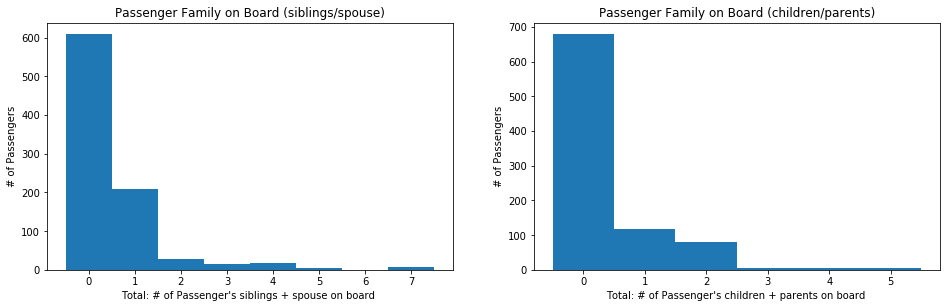

In [22]:
#Explore the sibSp (siblings/spouse of passenger [no.] ) parch(parents/children of passenger [no.])
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (16,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.hist(train['SibSp'], align = 'left', bins = 8)
ax1.set_xlabel("Total: # of Passenger's siblings + spouse on board ")
ax1.set_ylabel("# of Passengers")
ax1.set_title("Passenger Family on Board (siblings/spouse)")

ax2.hist(train['Parch'], align = 'left', bins = 6)
ax2.set_xlabel("Total: # of Passenger's children + parents on board ")
ax2.set_ylabel("# of Passengers")
ax2.set_title("Passenger Family on Board (children/parents)")
plt.show()

<font color=blue>CONCLUSION:</font> Most of the passengers were "single" on board, i.e. they had no biological family with them.

I'm going to explore if there is a correlation between survival and family on board.

1. Create new dataframe from train with `PassengerId`,`SibSp`,`Parch` and `survived`
2. Bin the `SibSp` and `Parch` columns as 0 or 1 (do not have family, do have family)
3. Calculate survival percentage (put in a contingency table)

In [11]:
train_family = train[["SibSp", "Parch", "PassengerId", "Survived"]].copy() #copy to avoid pink box warnings

#new columns of zero
train_family["SibSp_bin"] = 0
train_family["Parch_bin"] = 0

# change new columns zeros to one per conditional
train_family.loc[train_family["SibSp"] > 0, "SibSp_bin"] = 1
train_family.loc[train_family["Parch"] > 0, "Parch_bin"] = 1

#check
print(train_family["SibSp_bin"].value_counts())
print(train_family["Parch_bin"].value_counts())

0    608
1    283
Name: SibSp_bin, dtype: int64
0    678
1    213
Name: Parch_bin, dtype: int64


In [12]:
#Probability of survival if you had at least 1 sibling or spouse on board
g = train_family.groupby('SibSp_bin')
g1 = g.apply(lambda x: x[x['Survived'] == 1]["Survived"].count())
g2 = g.apply(lambda x: x[x['Survived'] == 0]["Survived"].count())

g12all = pd.concat([g1,g2],axis = 1)
g12all.rename(mapper = {0: "Survived", 1: "Not_Survived"}, axis = 'columns', inplace = True)
g12all["Prob_survive"] = g12all["Survived"]/g12all.sum(axis = 1)
print("index 0 means no family on board")
print(g12all)

index 0 means no family on board
           Survived  Not_Survived  Prob_survive
SibSp_bin                                      
0               210           398      0.345395
1               132           151      0.466431


In [13]:
g = train_family.groupby('Parch_bin')
g3 = g.apply(lambda x: x[x['Survived'] == 1]["Survived"].count())
g4 = g.apply(lambda x: x[x['Survived'] == 0]["Survived"].count())

g34all = pd.concat([g3,g4],axis = 1)
g34all.rename(mapper = {0: "Survived", 1: "Not_Survived"}, axis = 'columns', inplace = True)
g34all["Prob_survive"] = g34all["Survived"]/g34all.sum(axis = 1)
print("index 0 means no family on board")
print(g34all)

index 0 means no family on board
           Survived  Not_Survived  Prob_survive
Parch_bin                                      
0               233           445      0.343658
1               109           104      0.511737


<font color=blue>CONCLUSION:</font> Those traveling with family had a higher chance of survival than those without. Add column to `train` and `holdout` indicating whether the passenger had family on the ship.<br><br> 

In [14]:
#new tempoary columns
train["SibSp_bin"] = 0
train["Parch_bin"] = 0
holdout["SibSp_bin"] = 0
holdout["Parch_bin"] = 0

# change new columns zeros to one per conditional
train.loc[train_family["SibSp"] > 0, "SibSp_bin"] = 1
train.loc[train_family["Parch"] > 0, "Parch_bin"] = 1
holdout.loc[train_family["SibSp"] > 0, "SibSp_bin"] = 1
holdout.loc[train_family["Parch"] > 0, "Parch_bin"] = 1

#create Family column: 1 if Siblings, spouse, parents or children on board
train["Family"] = train["SibSp_bin"] + train["Parch_bin"]
holdout["Family"] = train["SibSp_bin"] + train["Parch_bin"]

#drop temporary columns
train.drop(labels = ["SibSp_bin", "Parch_bin"], axis = 'columns', inplace = True)
holdout.drop(labels = ["SibSp_bin", "Parch_bin"], axis = 'columns', inplace = True)



<br><br>
*FEATURE ENGINEERING*

In [15]:
#function which ranks features and selects the best number of features for a model
from sklearn.feature_selection import RFECV  

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#determine data types in train so categorical, object can be removed
train.dtypes

In [17]:
#function to select features from a Random Forest Classifier
def feature_selection(df):
    df.dropna(axis = "columns", inplace = True)
    df = df.select_dtypes(exclude = ['category', 'object'])
    all_X = df.drop(columns = ['PassengerId', 'Survived']).columns
    all_y = df["Survived"]
    rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
    grid = RFECV(rfc, cv = 10)
    grid.fit(X = df[all_X], y = all_y)
    best_columns = df[all_X].columns[grid.support_]
    return best_columns

In [18]:
#best columns(features) from the Random Forest Classifier
best_columns = feature_selection(train)

<br><br>
*MODEL SELECTION*

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
# a function to select a machine learning model using GridSearch and then output the results
"""
Usage
***************
dict_models = select_model(df, model_feature_columns, model_target_column)
"""
def select_model(df, features, target):  
    all_X = df[features]
    all_y = df[target]
    models = [{"name":'LogisticRegression',
                'estimator': LogisticRegression(max_iter = 1000), 
                "hyperparameters": 
                {"solver": ["newton-cg", "lbfgs", "liblinear"]}},
              {"name":'KNeighborsClassifier',
               'estimator': KNeighborsClassifier(), 
               "hyperparameters": 
               {"n_neighbors": range(1,20,2), 
                "weights": ["distance", "uniform"], 
                "algorithm": ["ball_tree", "kd_tree", "brute"], 
                "p": [1,2] }},
              {'name':'RandomForestClassifier',
               'estimator': RandomForestClassifier(),
               "hyperparameters": 
               {"n_estimators": [4, 6, 9], 
                "criterion": ["entropy", "gini"],
                "max_depth": [2, 5, 10],
                "max_features": ["log2", "sqrt"], 
                "min_samples_leaf": [1, 5, 8], 
                "min_samples_split": [2, 3, 5] }}
              ]
    for model in models:
        print(model["name"])
        grid = GridSearchCV(model["estimator"], param_grid = model['hyperparameters'], cv =10, iid = False)
        grid.fit(all_X, all_y)
        model["best_parameters"] = grid.best_params_
        model["best_parameters_score"] = grid.best_score_
        model["best_estimator"] = grid.best_estimator_
        print("model_best_estimator:", model["best_estimator"],
              "model best params:", model["best_parameters"], 
              "model accuracy (train data):", model["best_parameters_score"])

    return models

In [26]:
model_selection = select_model(train, best_columns, "Survived")

LogisticRegression
model_best_estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) model best params: {'solver': 'liblinear'} model accuracy (train data): 0.8238664737260242
KNeighborsClassifier
model_best_estimator: KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform') model best params: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'} model accuracy (train data): 0.7745397798206788
RandomForestClassifier
model_best_estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10,

<font color=blue>CONCLUSION:</font><br> 
Model accuracy ranking:

1. Random Forest<br>
2. Logistic Regression<br>
3. KNearest Neighbors

For predictions on the holdout data, use Random Forest with the following parameters:<br>
model best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
<br><br> 

*PREDICTIONS USING THE BEST MODEL*

In [39]:
best_estimator = model_selection[2]['best_estimator']
best_estimator

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
def save_submission(best_model, columns):
    best_model.fit(train[columns], train['Survived'])
    holdout_predictions= best_model.predict(holdout[columns])
    submission_df = {"PassengerId": holdout["PassengerId"], "Survived": holdout_predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv("submission.csv", index = False)
    return

In [41]:
save_submission(best_estimator, best_columns)

NOTE: confirmed that `submission.csv` has been saved.